In [1]:
import QUEVO
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
mutation_prob = 0.01
number_of_runs=50
gates = 3 # 5,10,15,20
chromosomes = 20
generations = 500
gate_types = ['cx', 'x', 'h', 'rxx', 'rzz', 'swap', 'z', 'y', 'toffoli']
target_entanglement = [0.9999999999999996]


In [3]:
#Additional code
import numpy as np
import matplotlib.pyplot as plt

def run_evolution(number_of_runs, mutation_prob):
    
    all_fitness_data = []
    best_fitness_per_gen = []

    for i in range(0, number_of_runs):
        
        init_gen = QUEVO.Generation(chromosomes, gates)
        init_gen.create_initial_generation(gate_types)

        init_gen.run_generation(target_entanglement)

        current_chromosome = init_gen.get_best_chromosome()
        best_chromosome = current_chromosome
        final_fitness = init_gen.get_best_fitness()

        final_fitness_list = [final_fitness]
        best_fitness_list = [final_fitness]

        for gen in range(0, generations):
            init_gen.evolve_into_next_generation(mutation_prob) 
            init_gen.run_generation(target_entanglement) 

            current_fitness = init_gen.get_best_fitness()
            current_chromosome = init_gen.get_best_chromosome()
            print((str(gen + 1)+"\n")+str(current_fitness),end='')

            if final_fitness > abs(current_fitness):
                final_fitness = current_fitness
                best_chromosome = current_chromosome

            final_fitness_list.append(current_fitness)
            best_fitness_list.append(max(best_fitness_list[-1], current_fitness))  # store the best fitness in each generation
            if current_fitness < 0.01:
                break
                
        all_fitness_data.append(final_fitness_list)
        best_fitness_per_gen.append(best_fitness_list)  # store the list of best fitnesses across all runs
        print("Run ", i+1, " completed ")
        
    # calculate mean and standard deviation, and standard error
    mean_fitness = np.mean(all_fitness_data, axis=0)
    std_fitness = np.std(all_fitness_data, axis=0)
    standard_error = std_fitness / np.sqrt(number_of_runs)
    
    # calculate the mean and standard deviation of the best fitness in each generation
    best_fitness_per_gen = np.array(best_fitness_per_gen)
    mean_best_fitness = np.mean(best_fitness_per_gen, axis=0)
    std_best_fitness = np.std(best_fitness_per_gen, axis=0)
    standard_error_best_fitness = std_best_fitness / np.sqrt(number_of_runs)

    # print the mean fitness, standard deviation, and standard error
    print('Mean fitness: ', mean_fitness)
    print('Standard deviation of fitness: ', std_fitness)
    print('Standard error of the mean fitness: ', standard_error)
    print('Mean best fitness: ', mean_best_fitness)
    print('Standard deviation of best fitness: ', std_best_fitness)
    print('Standard error of the mean best fitness: ', standard_error_best_fitness)
    
    return mean_fitness, std_fitness, standard_error, mean_best_fitness, std_best_fitness, standard_error_best_fitness

# call the function and save the data to a file
file_name = 'Mutation_0.01_3gates.txt'
mean_fitness, std_fitness, standard_error, mean_best_fitness, std_best_fitness, standard_error_best_fitness = run_evolution(number_of_runs=50, mutation_prob=0.01)
np.savetxt(file_name, np.column_stack((mean_fitness, std_fitness, standard_error, mean_best_fitness, std_best_fitness, standard_error_best_fitness)), header="Mean fitness, Standard deviation of fitness, Standard error of the mean fitness, Mean best fitness, Standard deviation of best fitness, Standard error of the mean best fitness", fmt='%1.4f', delimiter=',')

1
0.33333333333333282
0.33333333333333283
0.99999999999999964
0.99999999999999935
0.99999999999999966
0.99999999999999937
0.99999999999999938
0.99999999999999939
0.333333333333332910
0.999999999999999611
0.999999999999999612
0.999999999999999613
0.999999999999999614
0.999999999999999315
0.999999999999999316
0.999999999999999617
0.999999999999999618
0.999999999999999319
0.999999999999999620
0.999999999999999621
0.999999999999999322
0.999999999999999623
0.999999999999999324
0.999999999999999325
0.999999999999999626
0.999999999999999327
0.999999999999999628
0.333333333333332829
0.999999999999999330
0.999999999999999231
0.999999999999999332
0.999999999999999333
0.999999999999999334
0.999999999999999335
0.999999999999999636
0.999999999999999337
0.999999999999999638
0.999999999999999339
0.999999999999999340
0.999999999999999341
0.999999999999999642
0.999999999999999643
0.999999999999999344
0.999999999999999645
0.999999999999999646
0.999999999999999347
0.999999999999999348
0.99999999999999934

0.9999999999999993379
0.9999999999999993380
0.9999999999999992381
0.9999999999999996382
0.9999999999999993383
0.9999999999999993384
0.9999999999999996385
0.9999999999999996386
0.9999999999999993387
0.9999999999999993388
0.9999999999999996389
0.9999999999999996390
0.9999999999999993391
0.9999999999999993392
0.9999999999999993393
0.9999999999999993394
0.9999999999999993395
0.9999999999999993396
0.9999999999999993397
0.3333333333333328398
0.9999999999999993399
0.9999999999999996400
0.9999999999999993401
0.9999999999999993402
0.9999999999999996403
0.9999999999999993404
0.9999999999999996405
0.9999999999999993406
0.9999999999999993407
0.9999999999999996408
0.9999999999999993409
0.9999999999999993410
0.9999999999999996411
0.9999999999999996412
0.9999999999999996413
0.4999999999999998414
0.9999999999999993415
0.9999999999999996416
0.9999999999999993417
0.3333333333333328418
0.9999999999999993419
0.9999999999999992420
0.33333333333333304421
0.9999999999999993422
0.9999999999999993423
0.9999999

0.9999999999999993257
0.9999999999999993258
0.9999999999999996259
0.9999999999999993260
0.49999999999999967261
0.9999999999999993262
0.9999999999999993263
0.9999999999999993264
0.9999999999999993265
0.9999999999999993266
0.9999999999999996267
0.9999999999999996268
0.9999999999999996269
0.9999999999999993270
0.9999999999999996271
0.9999999999999993272
0.9999999999999993273
0.9999999999999993274
0.9999999999999996275
0.9999999999999993276
0.9999999999999996277
0.9999999999999993278
0.9999999999999993279
0.9999999999999993280
0.9999999999999993281
0.49999999999999967282
0.9999999999999993283
0.9999999999999993284
0.9999999999999993285
0.9999999999999993286
0.9999999999999993287
0.9999999999999996288
0.9999999999999993289
0.9999999999999993290
0.9999999999999993291
0.9999999999999993292
0.3333333333333328293
0.9999999999999993294
0.9999999999999993295
0.9999999999999993296
0.9999999999999996297
0.9999999999999993298
0.3333333333333328299
0.9999999999999993300
0.9999999999999996301
0.999999

0.3333333333333328133
0.3333333333333328134
0.3333333333333328135
0.3333333333333328136
0.3333333333333328137
0.3333333333333328138
0.3333333333333328139
0.3333333333333328140
0.3333333333333328141
0.3333333333333328142
0.3333333333333328143
0.3333333333333328144
0.3333333333333328145
0.3333333333333328146
0.3333333333333328147
0.3333333333333328148
0.3333333333333328149
0.3333333333333328150
0.3333333333333328151
0.3333333333333328152
0.3333333333333328153
0.3333333333333328154
0.3333333333333328155
0.3333333333333328156
0.3333333333333328157
0.3333333333333328158
0.3333333333333328159
0.3333333333333328160
0.3333333333333328161
0.3333333333333328162
0.3333333333333328163
0.3333333333333328164
0.3333333333333328165
0.3333333333333328166
0.3333333333333328167
0.3333333333333328168
0.3333333333333328169
0.3333333333333328170
0.3333333333333328171
0.3333333333333328172
0.3333333333333328173
0.3333333333333328174
0.3333333333333328175
0.3333333333333328176
0.3333333333333328177
0.33333333

0.99999999999999964
0.99999999999999935
0.99999999999999936
0.99999999999999967
0.99999999999999968
0.99999999999999969
0.999999999999999310
0.999999999999999611
0.999999999999999312
0.999999999999999313
0.999999999999999314
0.999999999999999315
0.999999999999999316
0.999999999999999617
0.999999999999999318
0.999999999999999319
0.999999999999999320
0.333333333333332821
0.999999999999999622
0.999999999999999323
0.999999999999999624
0.999999999999999325
0.999999999999999326
0.999999999999999327
0.999999999999999328
0.999999999999999329
0.999999999999999630
0.999999999999999331
0.999999999999999332
0.999999999999999333
0.999999999999999334
0.999999999999999335
0.999999999999999336
0.999999999999999337
0.999999999999999338
0.999999999999999339
0.999999999999999640
0.999999999999999641
0.999999999999999642
0.333333333333332843
0.999999999999999344
0.999999999999999645
0.999999999999999346
0.999999999999999247
0.999999999999999348
0.999999999999999349
0.999999999999999350
0.99999999999999965

0.9999999999999993383
0.9999999999999996384
0.9999999999999993385
0.9999999999999996386
0.9999999999999993387
0.3333333333333328388
0.9999999999999993389
0.9999999999999996390
0.9999999999999996391
0.9999999999999993392
0.9999999999999993393
0.33333333333333304394
0.9999999999999993395
0.9999999999999996396
0.9999999999999996397
0.9999999999999993398
0.9999999999999993399
0.9999999999999996400
0.9999999999999993401
0.9999999999999993402
0.9999999999999993403
0.9999999999999996404
0.9999999999999993405
0.9999999999999993406
0.9999999999999993407
0.9999999999999993408
0.9999999999999996409
0.9999999999999993410
0.9999999999999996411
0.9999999999999993412
0.9999999999999993413
0.9999999999999993414
0.9999999999999993415
0.9999999999999996416
0.9999999999999996417
0.9999999999999993418
0.9999999999999996419
0.9999999999999996420
0.9999999999999993421
0.9999999999999996422
0.9999999999999996423
0.9999999999999996424
0.9999999999999993425
0.9999999999999993426
0.9999999999999993427
0.9999999

0.3333333333333330470
0.3333333333333330471
0.3333333333333330472
0.3333333333333330473
0.3333333333333330474
0.3333333333333330475
0.3333333333333330476
0.3333333333333330477
0.3333333333333330478
0.3333333333333330479
0.3333333333333330480
0.3333333333333330481
0.3333333333333330482
0.3333333333333330483
0.3333333333333330484
0.3333333333333330485
0.3333333333333330486
0.3333333333333330487
0.3333333333333330488
0.3333333333333330489
0.3333333333333330490
0.3333333333333330491
0.3333333333333330492
0.3333333333333330493
0.3333333333333330494
0.3333333333333330495
0.3333333333333330496
0.3333333333333330497
0.3333333333333330498
0.3333333333333330499
0.33333333333333304100
0.33333333333333304101
0.33333333333333304102
0.33333333333333304103
0.33333333333333304104
0.33333333333333304105
0.33333333333333304106
0.33333333333333304107
0.3333333333333328108
0.33333333333333304109
0.33333333333333304110
0.33333333333333304111
0.33333333333333304112
0.33333333333333304113
0.33333333333333304

0.33333333333333304429
0.33333333333333304430
0.33333333333333304431
0.33333333333333304432
0.33333333333333304433
0.33333333333333304434
0.33333333333333304435
0.33333333333333304436
0.33333333333333304437
0.33333333333333304438
0.33333333333333304439
0.33333333333333304440
0.33333333333333304441
0.33333333333333304442
0.33333333333333304443
0.33333333333333304444
0.33333333333333304445
0.33333333333333304446
0.33333333333333304447
0.33333333333333304448
0.33333333333333304449
0.33333333333333304450
0.33333333333333304451
0.33333333333333304452
0.33333333333333304453
0.3333333333333328454
0.33333333333333304455
0.33333333333333304456
0.33333333333333304457
0.33333333333333304458
0.33333333333333304459
0.33333333333333304460
0.33333333333333304461
0.33333333333333304462
0.33333333333333304463
0.33333333333333304464
0.33333333333333304465
0.33333333333333304466
0.33333333333333304467
0.33333333333333304468
0.33333333333333304469
0.33333333333333304470
0.33333333333333304471
0.3333333333

0.9999999999999996303
0.9999999999999993304
0.9999999999999996305
0.9999999999999993306
0.9999999999999993307
0.9999999999999993308
0.9999999999999993309
0.9999999999999996310
0.9999999999999993311
0.9999999999999993312
0.9999999999999993313
0.9999999999999996314
0.9999999999999993315
0.9999999999999993316
0.9999999999999993317
0.9999999999999993318
0.9999999999999993319
0.9999999999999993320
0.9999999999999993321
0.9999999999999993322
0.9999999999999993323
0.9999999999999996324
0.9999999999999996325
0.9999999999999996326
0.9999999999999993327
0.9999999999999993328
0.9999999999999996329
0.9999999999999993330
0.3333333333333328331
0.9999999999999993332
0.9999999999999993333
0.9999999999999993334
0.9999999999999996335
0.9999999999999993336
0.9999999999999996337
0.9999999999999998338
0.9999999999999993339
0.9999999999999993340
0.9999999999999993341
0.9999999999999996342
0.9999999999999993343
0.9999999999999993344
0.9999999999999993345
0.9999999999999993346
0.9999999999999996347
0.99999999

0.9999999999999993179
0.9999999999999996180
0.9999999999999996181
0.9999999999999992182
0.9999999999999993183
0.9999999999999996184
0.9999999999999996185
0.9999999999999993186
0.9999999999999993187
0.9999999999999996188
0.9999999999999996189
0.9999999999999996190
0.9999999999999993191
0.9999999999999996192
0.9999999999999998193
0.9999999999999993194
0.9999999999999996195
0.9999999999999993196
0.9999999999999993197
0.9999999999999996198
0.3333333333333328199
0.9999999999999996200
0.9999999999999996201
0.9999999999999993202
0.9999999999999993203
0.9999999999999993204
0.9999999999999993205
0.9999999999999993206
0.9999999999999993207
0.9999999999999996208
0.9999999999999996209
0.9999999999999996210
0.9999999999999993211
0.9999999999999996212
0.9999999999999996213
0.9999999999999993214
0.9999999999999998215
0.9999999999999993216
0.9999999999999996217
0.9999999999999992218
0.9999999999999993219
0.9999999999999993220
0.9999999999999993221
0.9999999999999993222
0.9999999999999998223
0.99999999

0.999999999999999355
0.999999999999999356
0.999999999999999657
0.999999999999999358
0.999999999999999359
0.999999999999999360
0.999999999999999661
0.999999999999999362
0.999999999999999663
0.999999999999999364
0.999999999999999365
0.999999999999999366
0.999999999999999367
0.999999999999999668
0.999999999999999369
0.999999999999999370
0.999999999999999671
0.999999999999999372
0.999999999999999373
0.999999999999999674
0.999999999999999675
0.999999999999999376
0.999999999999999677
0.999999999999999378
0.999999999999999379
0.999999999999999380
0.999999999999999381
0.999999999999999382
0.999999999999999683
0.999999999999999384
0.999999999999999385
0.999999999999999686
0.999999999999999687
0.999999999999999388
0.999999999999999389
0.999999999999999690
0.999999999999999691
0.333333333333332892
0.999999999999999693
0.999999999999999694
0.999999999999999395
0.999999999999999396
0.999999999999999397
0.999999999999999398
0.999999999999999399
0.9999999999999993100
0.3333333333333328101
0.999999999

0.9999999999999996434
0.9999999999999996435
0.9999999999999993436
0.9999999999999996437
0.9999999999999993438
0.9999999999999993439
0.9999999999999993440
0.9999999999999996441
0.9999999999999993442
0.9999999999999993443
0.9999999999999993444
0.9999999999999996445
0.9999999999999993446
0.9999999999999993447
0.9999999999999993448
0.9999999999999996449
0.9999999999999996450
0.9999999999999992451
0.9999999999999996452
0.9999999999999996453
0.9999999999999993454
0.9999999999999993455
0.9999999999999993456
0.9999999999999993457
0.9999999999999993458
0.9999999999999993459
0.9999999999999993460
0.9999999999999993461
0.9999999999999993462
0.9999999999999996463
0.9999999999999993464
0.9999999999999993465
0.9999999999999993466
0.9999999999999993467
0.9999999999999996468
0.9999999999999993469
0.9999999999999993470
0.9999999999999993471
0.9999999999999993472
0.9999999999999993473
0.9999999999999996474
0.9999999999999993475
0.9999999999999996476
0.9999999999999993477
0.9999999999999993478
0.99999999

0.9999999999999993311
0.9999999999999996312
0.9999999999999993313
0.9999999999999993314
0.9999999999999996315
0.9999999999999993316
0.9999999999999993317
0.9999999999999996318
0.9999999999999993319
0.9999999999999993320
0.9999999999999996321
0.9999999999999993322
0.9999999999999996323
0.9999999999999996324
0.9999999999999993325
0.9999999999999993326
1.0327
0.9999999999999996328
0.9999999999999993329
0.9999999999999993330
0.9999999999999993331
0.9999999999999993332
0.9999999999999993333
0.9999999999999993334
0.9999999999999992335
0.9999999999999993336
0.9999999999999993337
0.9999999999999993338
0.9999999999999993339
0.9999999999999993340
0.9999999999999993341
0.9999999999999993342
0.9999999999999993343
0.49999999999999967344
0.9999999999999993345
0.9999999999999993346
0.9999999999999993347
0.33333333333333304348
0.9999999999999993349
0.9999999999999993350
0.9999999999999993351
0.9999999999999996352
0.9999999999999993353
0.9999999999999993354
0.9999999999999993355
0.9999999999999993356
0

0.9999999999999993188
0.9999999999999993189
0.9999999999999993190
0.9999999999999993191
0.9999999999999996192
0.9999999999999993193
0.9999999999999993194
0.9999999999999996195
0.9999999999999993196
0.9999999999999996197
0.9999999999999993198
0.9999999999999993199
0.9999999999999993200
0.9999999999999993201
0.9999999999999993202
0.9999999999999993203
0.9999999999999993204
0.9999999999999993205
0.9999999999999993206
0.9999999999999993207
0.9999999999999993208
0.9999999999999993209
0.9999999999999993210
0.9999999999999996211
0.9999999999999996212
0.9999999999999993213
0.9999999999999993214
0.9999999999999993215
0.9999999999999993216
0.9999999999999993217
0.9999999999999993218
0.9999999999999993219
0.9999999999999993220
0.9999999999999993221
0.9999999999999996222
0.9999999999999993223
0.9999999999999993224
0.9999999999999993225
0.9999999999999993226
0.9999999999999996227
0.9999999999999996228
0.9999999999999993229
0.9999999999999993230
0.9999999999999993231
0.9999999999999993232
0.99999999

0.873814740142225663
0.333333333333332964
0.333333333333332965
0.873814740142225666
0.4999999999999996767
0.999999999999999168
0.333333333333332969
0.333333333333332870
0.873814740142225671
0.333333333333332972
0.873814740142225673
0.333333333333332974
0.288776398347990375
0.288776398347990376
0.288776398347990377
0.288776398347990378
0.288776398347990379
0.288776398347990380
0.288776398347990381
0.288776398347990382
0.288776398347990383
0.288776398347990384
0.288776398347990385
0.288776398347990386
0.288776398347990387
0.288776398347990388
0.288776398347990389
0.288776398347990390
0.288776398347990391
0.288776398347990392
0.288776398347990393
0.288776398347990394
0.288776398347990395
0.288776398347990396
0.288776398347990397
0.288776398347990398
0.288776398347990399
0.2887763983479903100
0.2887763983479903101
0.2887763983479903102
0.2887763983479903103
0.2887763983479903104
0.2887763983479903105
0.2887763983479903106
0.2887763983479903107
0.2887763983479903108
0.2887763983479903109
0.

0.2887763983479903436
0.2887763983479903437
0.2887763983479903438
0.2887763983479903439
0.2887763983479903440
0.2887763983479903441
0.2887763983479903442
0.2887763983479903443
0.2887763983479903444
0.2887763983479903445
0.2887763983479903446
0.2887763983479903447
0.2887763983479903448
0.2887763983479903449
0.2887763983479903450
0.2887763983479903451
0.2887763983479903452
0.2887763983479903453
0.2887763983479903454
0.2887763983479903455
0.2887763983479903456
0.2887763983479903457
0.2887763983479903458
0.2887763983479903459
0.2887763983479903460
0.2887763983479903461
0.2887763983479903462
0.2887763983479903463
0.2887763983479903464
0.2887763983479903465
0.2887763983479903466
0.2887763983479903467
0.2887763983479903468
0.2887763983479903469
0.2887763983479903470
0.2887763983479903471
0.2887763983479903472
0.1666666666666663473
0.2887763983479903474
0.2887763983479903475
0.2887763983479903476
0.2887763983479903477
0.2887763983479903478
0.2887763983479903479
0.2887763983479903480
0.28877639

0.9999999999999996314
0.9999999999999996315
0.9999999999999996316
0.9999999999999993317
0.9999999999999996318
0.9999999999999996319
0.9999999999999996320
0.9999999999999996321
0.9999999999999993322
0.9999999999999993323
0.9999999999999996324
0.9999999999999996325
0.9999999999999993326
0.9999999999999992327
0.9999999999999998328
0.9999999999999993329
0.9999999999999996330
0.9999999999999993331
0.9999999999999993332
0.9999999999999998333
0.9999999999999996334
0.9999999999999996335
0.9999999999999993336
0.9999999999999996337
0.9999999999999993338
0.9999999999999993339
1.0340
0.9999999999999996341
0.9999999999999993342
0.9999999999999996343
0.9999999999999993344
0.9999999999999996345
0.9999999999999993346
1.0347
0.9999999999999996348
0.9999999999999993349
0.9999999999999996350
0.9999999999999996351
0.9999999999999993352
0.9999999999999996353
0.9999999999999993354
0.9999999999999996355
0.9999999999999996356
0.9999999999999996357
0.9999999999999993358
0.9999999999999996359
0.9999999999999996

0.9999999999999996196
0.9999999999999996197
0.9999999999999996198
0.3333333333333328199
0.9999999999999996200
0.9999999999999996201
0.9999999999999996202
0.9999999999999996203
0.9999999999999996204
0.9999999999999996205
0.9999999999999996206
0.9999999999999996207
0.9999999999999996208
0.9999999999999996209
0.9999999999999996210
0.9999999999999996211
0.9999999999999996212
0.9999999999999996213
0.9999999999999996214
0.9999999999999996215
0.3333333333333328216
0.9999999999999996217
0.9999999999999996218
0.9999999999999996219
0.9999999999999996220
0.9999999999999996221
0.9999999999999996222
0.3333333333333328223
0.9999999999999996224
0.9999999999999996225
0.9999999999999996226
0.9999999999999996227
0.9999999999999996228
0.9999999999999996229
0.9999999999999996230
0.9999999999999996231
0.9999999999999996232
0.9999999999999996233
0.9999999999999996234
0.9999999999999996235
0.9999999999999996236
0.9999999999999996237
0.9999999999999996238
0.9999999999999996239
0.9999999999999996240
0.99999999

0.333333333333332872
0.333333333333332873
0.333333333333332874
0.333333333333332875
0.333333333333332876
0.333333333333332877
0.333333333333332878
0.333333333333332879
0.333333333333332880
0.333333333333332881
0.333333333333332882
0.333333333333332883
0.333333333333332884
0.333333333333332885
0.333333333333332886
0.333333333333332887
0.333333333333332888
0.333333333333332889
0.333333333333332890
0.333333333333332891
0.333333333333332892
0.333333333333332893
0.333333333333332894
0.333333333333332895
0.333333333333332896
0.333333333333332897
0.333333333333332898
0.333333333333332899
0.3333333333333328100
0.3333333333333328101
0.3333333333333328102
0.3333333333333328103
0.3333333333333328104
0.3333333333333328105
0.3333333333333328106
0.3333333333333328107
0.3333333333333328108
0.3333333333333328109
0.3333333333333328110
0.3333333333333328111
0.3333333333333328112
0.3333333333333328113
0.3333333333333328114
0.3333333333333328115
0.3333333333333328116
0.31630768487526684117
0.3076294723848

0.31630768487526684437
0.31630768487526684438
0.31630768487526684439
0.3163076848752667440
0.3117302006998113441
0.33226278932150843442
0.31630768487526684443
0.31630768487526684444
0.31630768487526684445
0.3163076848752667446
0.31630768487526684447
0.3163076848752667448
0.30953394297392434449
0.31630768487526684450
0.28686328714559506451
0.31630768487526684452
0.31630768487526684453
0.31630768487526684454
0.3168935756863712455
0.31630768487526684456
0.3091562396452906457
0.31630768487526684458
0.31630768487526684459
0.2979020916891184460
0.3163076848752667461
0.31630768487526684462
0.31630768487526684463
0.3163076848752667464
0.32942256917334156465
0.33230647614115794466
0.31630768487526684467
0.31630768487526684468
0.33057540618317405469
0.29024524662066753470
0.31630768487526684471
0.31630768487526684472
0.315657946825072473
0.3163076848752667474
0.29238103543368066475
0.28542595034477936476
0.3324239279318094477
0.31630768487526684478
0.31630768487526684479
0.31630768487526684480
0

1.0487
1.0488
1.0489
1.0490
1.0491
1.0492
1.0493
1.0494
1.0495
1.0496
1.0497
1.0498
1.0499
1.0500
1.0Run  16  completed 
1
0.33333333333333282
0.33333333333333283
0.33333333333333284
0.33333333333333285
0.33333333333333286
0.33333333333333287
0.33333333333333288
0.33333333333333289
0.333333333333332810
0.333333333333332811
0.333333333333332812
0.333333333333332813
0.333333333333332814
0.333333333333332815
0.333333333333332816
0.333333333333332817
0.333333333333332818
0.333333333333332819
0.333333333333332820
0.333333333333332821
0.333333333333332822
0.333333333333332823
0.333333333333332824
0.333333333333332825
0.333333333333332826
0.333333333333332827
0.333333333333332828
0.333333333333332829
0.333333333333332830
0.333333333333332831
0.333333333333332832
0.333333333333332833
0.333333333333332834
0.333333333333332835
0.333333333333332836
0.333333333333332837
0.333333333333332838
0.333333333333332839
0.333333333333332840
0.333333333333332841
0.333333333333332842
0.333333333333332843
0.3

0.3333333333333328373
0.3333333333333328374
0.3333333333333328375
0.3333333333333328376
0.3333333333333328377
0.3333333333333328378
0.3333333333333328379
0.3333333333333328380
0.3333333333333328381
0.3333333333333328382
0.1666666666666663383
0.3333333333333328384
0.3333333333333328385
0.3333333333333328386
0.3333333333333328387
0.3333333333333328388
0.3333333333333328389
0.3333333333333328390
0.3333333333333328391
0.3333333333333328392
0.3333333333333328393
0.3333333333333328394
0.3333333333333328395
0.3333333333333328396
0.3333333333333328397
0.3333333333333328398
0.3333333333333328399
0.3333333333333328400
0.3333333333333328401
0.3333333333333328402
0.3333333333333328403
0.3333333333333328404
0.3333333333333328405
0.3333333333333328406
0.3333333333333328407
0.3333333333333328408
0.3333333333333328409
0.3333333333333328410
0.3333333333333328411
0.3333333333333328412
0.1666666666666663413
0.3333333333333328414
0.3333333333333328415
0.3333333333333328416
0.3333333333333328417
0.33333333

0.9999999999999996249
0.9999999999999996250
0.9999999999999993251
0.9999999999999993252
0.9999999999999993253
0.9999999999999996254
0.9999999999999992255
0.9999999999999993256
0.9999999999999996257
0.9999999999999993258
0.49999999999999967259
0.9999999999999993260
0.9999999999999993261
0.9999999999999996262
0.33333333333333304263
0.9999999999999993264
0.9999999999999993265
0.9999999999999996266
0.9999999999999993267
0.9999999999999993268
0.9999999999999993269
0.9999999999999993270
0.9999999999999993271
0.9999999999999993272
0.9999999999999993273
0.9999999999999993274
0.9999999999999993275
0.9999999999999996276
0.9999999999999993277
0.9999999999999993278
0.9999999999999996279
0.9999999999999993280
0.33333333333333304281
0.3333333333333328282
0.49999999999999967283
0.9999999999999993284
0.9999999999999993285
0.9999999999999993286
0.9999999999999996287
0.9999999999999993288
0.9999999999999993289
0.9999999999999996290
0.9999999999999996291
0.9999999999999996292
0.9999999999999996293
0.9999

0.9999999999999996126
0.9999999999999996127
0.9999999999999996128
0.9999999999999996129
0.9999999999999996130
0.9999999999999996131
0.9999999999999996132
0.9999999999999996133
0.9999999999999996134
0.9999999999999996135
0.9999999999999996136
0.9999999999999996137
0.9999999999999996138
0.9999999999999996139
0.9999999999999996140
0.9999999999999996141
0.9999999999999996142
0.9999999999999996143
0.9999999999999996144
0.9999999999999996145
0.9999999999999996146
0.9999999999999996147
0.9999999999999996148
0.9999999999999996149
0.9999999999999996150
0.9999999999999996151
0.9999999999999996152
0.9999999999999996153
0.3333333333333328154
0.9999999999999996155
0.3333333333333328156
0.9999999999999996157
0.9999999999999996158
0.9999999999999996159
0.9999999999999996160
0.9999999999999996161
0.9999999999999996162
0.9999999999999996163
0.9999999999999996164
0.9999999999999996165
0.9999999999999996166
0.9999999999999996167
0.9999999999999996168
0.9999999999999996169
0.9999999999999996170
0.99999999

0.9999999999999998499
0.9999999999999998500
0.3333333333333328Run  19  completed 
1
0.30464326360402142
0.99999999999999963
0.99999999999999964
0.99999999999999965
0.99999999999999966
0.99999999999999967
0.99999999999999968
0.99999999999999969
0.999999999999999610
0.999999999999999611
0.999999999999999612
0.999999999999999613
0.999999999999999614
0.999999999999999615
0.999999999999999616
0.999999999999999617
0.999999999999999618
0.333333333333332819
0.999999999999999620
0.999999999999999621
0.999999999999999622
0.999999999999999623
0.999999999999999624
0.999999999999999625
0.999999999999999626
0.999999999999999627
0.999999999999999628
0.999999999999999629
0.999999999999999630
0.999999999999999631
0.999999999999999632
0.999999999999999633
0.999999999999999634
0.999999999999999635
0.999999999999999636
0.999999999999999637
0.999999999999999638
0.999999999999999639
0.999999999999999640
0.999999999999999641
0.999999999999999642
0.999999999999999643
0.999999999999999644
0.999999999999999645


0.9999999999999996376
0.9999999999999996377
0.9999999999999996378
0.9999999999999996379
0.9999999999999996380
0.9999999999999996381
0.9999999999999996382
0.3333333333333328383
0.9999999999999996384
0.3333333333333328385
0.9999999999999996386
0.9999999999999996387
0.9999999999999996388
0.9999999999999996389
0.9999999999999996390
0.9999999999999996391
0.9999999999999996392
0.9999999999999996393
0.9999999999999996394
0.9999999999999996395
0.9999999999999996396
0.9999999999999996397
0.9999999999999996398
0.9999999999999996399
0.9999999999999996400
0.9999999999999996401
0.9999999999999996402
0.9999999999999996403
0.9999999999999996404
0.9999999999999996405
0.9999999999999996406
0.9999999999999996407
0.9999999999999996408
0.9999999999999996409
0.9999999999999996410
0.9999999999999996411
0.9999999999999996412
0.9999999999999996413
0.9999999999999996414
0.3333333333333328415
0.9999999999999996416
0.9999999999999996417
0.9999999999999996418
0.9999999999999996419
0.9999999999999996420
0.99999999

0.9999999999999993255
0.9999999999999996256
0.9999999999999996257
0.9999999999999996258
0.9999999999999996259
0.9999999999999996260
0.9999999999999996261
0.9999999999999996262
0.9999999999999996263
0.3333333333333329264
0.9999999999999996265
0.9999999999999996266
0.9999999999999996267
0.9999999999999996268
0.9999999999999993269
0.9999999999999993270
0.9999999999999993271
0.9999999999999996272
0.9999999999999993273
0.9999999999999996274
0.9999999999999996275
0.9999999999999993276
0.9999999999999993277
0.9999999999999996278
0.9999999999999996279
0.9999999999999996280
0.9999999999999996281
0.9999999999999993282
0.9999999999999993283
0.9999999999999993284
0.9999999999999996285
0.9999999999999993286
0.9999999999999993287
0.9999999999999993288
0.9999999999999993289
0.9999999999999996290
0.9999999999999993291
0.9999999999999993292
0.9999999999999993293
0.9999999999999993294
0.9999999999999993295
0.9999999999999993296
0.9999999999999996297
0.9999999999999993298
0.9999999999999993299
0.99999999

0.3333333333333328133
0.3333333333333328134
0.3333333333333328135
0.3333333333333328136
0.3333333333333328137
0.3333333333333328138
0.3333333333333328139
0.3333333333333328140
0.3333333333333328141
0.3333333333333328142
0.3333333333333328143
0.3333333333333328144
0.3333333333333328145
0.3333333333333328146
0.3333333333333328147
0.3333333333333328148
0.3333333333333328149
0.3333333333333328150
0.3333333333333328151
0.3333333333333329152
0.3333333333333328153
0.3333333333333328154
0.3333333333333328155
0.3333333333333328156
0.3333333333333329157
0.3333333333333328158
0.3333333333333328159
0.3333333333333328160
0.3333333333333328161
0.3333333333333329162
0.3333333333333329163
0.3333333333333328164
0.3333333333333328165
0.3333333333333329166
0.3333333333333328167
0.3333333333333328168
0.3333333333333328169
0.3333333333333329170
0.3333333333333328171
0.3333333333333328172
0.3333333333333328173
0.3333333333333329174
0.3333333333333329175
0.3333333333333328176
0.3333333333333328177
0.33333333

0.99999999999999964
0.99999999999999935
0.33333333333333286
0.99999999999999937
0.99999999999999938
0.99999999999999989
0.999999999999999310
0.999999999999999311
0.999999999999999312
0.999999999999999313
0.999999999999999314
0.999999999999999315
0.999999999999999616
0.999999999999999617
0.999999999999999318
0.999999999999999319
0.999999999999999320
0.999999999999999321
0.999999999999999322
0.333333333333332823
0.999999999999999624
0.999999999999999325
0.999999999999999326
0.999999999999999627
0.999999999999999328
0.999999999999999629
0.999999999999999330
0.999999999999999331
0.999999999999999332
0.999999999999999333
0.999999999999999334
0.999999999999999635
0.999999999999999636
0.999999999999999337
0.999999999999999338
0.999999999999999339
0.999999999999999340
0.999999999999999641
0.999999999999999642
0.999999999999999343
0.999999999999999344
0.999999999999999345
0.999999999999999346
0.999999999999999647
0.4999999999999995648
0.999999999999999349
0.999999999999999350
0.9999999999999993

0.3333333333333328381
0.3333333333333328382
0.3333333333333328383
0.3333333333333328384
0.3333333333333328385
0.3333333333333328386
0.7915932351841819387
0.3333333333333328388
0.3333333333333328389
0.8760079232166836390
0.8760079232166836391
0.3333333333333328392
0.3333333333333328393
0.3333333333333328394
0.8760079232166836395
0.3333333333333328396
0.3333333333333328397
0.3333333333333328398
0.3333333333333328399
0.3333333333333328400
0.3333333333333328401
0.6182777949238859402
0.3333333333333328403
0.3333333333333328404
0.3333333333333328405
0.3333333333333328406
0.3333333333333328407
0.3333333333333328408
0.8760079232166836409
0.3333333333333328410
0.3333333333333328411
0.3333333333333328412
0.3333333333333328413
0.3333333333333328414
0.3333333333333328415
0.41235700516866614416
0.3333333333333328417
0.3333333333333328418
0.3333333333333328419
0.3333333333333328420
0.3333333333333328421
0.3333333333333328422
0.3333333333333328423
0.3333333333333328424
0.3333333333333328425
0.3333333

0.9999999999999996259
0.9999999999999996260
0.9999999999999996261
0.9999999999999996262
0.9999999999999996263
0.9999999999999996264
0.9999999999999996265
0.9999999999999996266
0.9999999999999996267
0.9999999999999996268
0.9999999999999996269
0.9999999999999996270
0.3333333333333328271
0.9999999999999996272
0.9999999999999996273
0.9999999999999996274
0.9999999999999996275
0.9999999999999996276
0.9999999999999996277
0.9999999999999996278
0.9999999999999996279
0.9999999999999996280
0.9999999999999996281
0.9999999999999996282
0.9999999999999996283
0.9999999999999996284
0.9999999999999996285
0.9999999999999996286
0.3333333333333328287
0.9999999999999996288
0.9999999999999996289
0.9999999999999996290
0.9999999999999996291
0.9999999999999996292
0.9999999999999996293
0.9999999999999996294
0.9999999999999996295
0.9999999999999996296
0.9999999999999996297
0.9999999999999996298
0.9999999999999996299
0.9999999999999996300
0.9999999999999996301
0.9999999999999996302
0.9999999999999996303
0.99999999

0.49999999999999967135
0.3333333333333328136
0.3333333333333328137
0.49999999999999967138
0.3333333333333328139
0.3333333333333328140
0.3333333333333328141
0.3333333333333328142
0.3333333333333328143
0.3333333333333328144
0.3333333333333328145
0.3333333333333328146
0.3333333333333328147
0.3333333333333328148
0.3333333333333328149
0.3333333333333328150
0.3333333333333328151
0.3333333333333328152
0.3333333333333328153
0.3333333333333328154
0.3333333333333328155
0.3333333333333328156
0.3333333333333328157
0.3333333333333328158
0.3333333333333328159
0.49999999999999967160
0.49999999999999967161
0.3333333333333328162
0.3333333333333328163
0.3333333333333328164
0.49999999999999967165
0.3333333333333328166
0.3333333333333328167
0.3333333333333328168
0.3333333333333328169
0.3333333333333328170
0.3333333333333328171
0.3333333333333328172
0.3333333333333328173
0.9999999999999996174
0.3333333333333328175
0.3333333333333328176
0.3333333333333328177
0.3333333333333328178
0.3333333333333328179
0.333

0.33333333333333285
0.33333333333333286
0.33333333333333287
0.33333333333333288
0.33333333333333289
0.333333333333332810
0.999999999999999311
0.999999999999999312
0.999999999999999613
0.999999999999999314
0.999999999999999315
0.999999999999999316
0.999999999999999617
0.999999999999999318
0.999999999999999619
0.999999999999999620
0.999999999999999321
0.4999999999999996722
0.999999999999999323
0.999999999999999324
0.999999999999999325
0.999999999999999626
0.999999999999999327
0.999999999999999328
0.999999999999999329
0.999999999999999330
0.999999999999999631
0.999999999999999832
0.999999999999999333
0.999999999999999334
0.999999999999999335
0.4999999999999996736
0.999999999999999337
0.999999999999999338
0.999999999999999339
0.999999999999999340
0.999999999999999641
0.999999999999999342
0.999999999999999343
0.999999999999999644
0.999999999999999245
0.999999999999999646
0.999999999999999347
0.999999999999999648
0.999999999999999349
0.999999999999999650
0.999999999999999351
0.99999999999999

0.8442601689639542385
0.8433664873882372386
0.8533622127936802387
0.9729631139777936388
0.9729631139777936389
0.9729631139777936390
0.9999999999999993391
0.9509763074370429392
0.3333333333333328393
0.8652749369031401394
0.8443557171457373395
0.8448683898460376396
0.8569528378876883397
0.9729631139777936398
0.9729631139777936399
0.9729631139777936400
0.8690697262860725401
0.9729631139777936402
0.22886748483879626403
0.3333333333333328404
0.9729631139777936405
0.9729631139777936406
0.8647066960491254407
0.9729631139777936408
0.9729631139777936409
0.9531156398927396410
0.9729631139777936411
0.842013769975742412
0.9729631139777936413
0.8447613335706281414
0.8649843548735745415
0.932787916282318416
0.9729631139777936417
0.9140177604713244418
0.9729631139777936419
0.3333333333333328420
0.9729631139777936421
0.8418861572454053422
0.9729631139777936423
0.8525756569376783424
0.942141956481473425
0.9579224165457132426
0.9729631139777936427
0.843991695649869428
0.9729631139777936429
0.85604569611

0.9999999999999993262
0.9999999999999996263
0.9999999999999993264
0.9999999999999996265
0.33333333333333304266
0.9999999999999993267
0.9999999999999993268
0.9999999999999993269
0.9999999999999993270
0.3333333333333328271
0.9999999999999996272
0.9999999999999996273
0.9999999999999993274
0.9999999999999993275
0.9999999999999993276
0.9999999999999993277
0.9999999999999993278
0.26267095891270276279
0.9999999999999993280
0.9999999999999993281
0.3333333333333328282
0.9999999999999993283
0.9999999999999993284
0.9999999999999993285
0.9999999999999996286
0.9999999999999996287
0.9999999999999993288
0.9999999999999993289
0.9999999999999993290
0.9999999999999996291
0.9999999999999993292
0.9999999999999993293
0.9999999999999993294
0.9999999999999993295
0.9999999999999993296
0.9999999999999993297
0.9999999999999996298
0.9999999999999993299
0.9999999999999993300
0.3333333333333328301
0.9999999999999993302
0.9999999999999996303
0.9999999999999993304
0.9999999999999996305
0.9999999999999993306
0.999999

0.3333333333333328140
0.3333333333333328141
0.3333333333333328142
0.3333333333333328143
0.3333333333333328144
0.3333333333333328145
0.3333333333333328146
0.3333333333333328147
0.3333333333333328148
0.3333333333333328149
0.3333333333333328150
0.3333333333333328151
0.3333333333333328152
0.3333333333333328153
0.1666666666666663154
0.3333333333333328155
0.3333333333333328156
0.3333333333333328157
0.3333333333333328158
0.3333333333333328159
0.3333333333333328160
0.3333333333333328161
0.3333333333333328162
0.3333333333333328163
0.3333333333333328164
0.3333333333333328165
0.3333333333333328166
0.3333333333333328167
0.3333333333333328168
0.3333333333333328169
0.3333333333333328170
0.3333333333333328171
0.3333333333333328172
0.3333333333333328173
0.3333333333333328174
0.3333333333333328175
0.3333333333333328176
0.3333333333333328177
0.3333333333333328178
0.3333333333333328179
0.3333333333333328180
0.3333333333333328181
0.3333333333333328182
0.3333333333333328183
0.3333333333333328184
0.33333333

0.999999999999999814
0.999999999999999815
0.999999999999999816
0.999999999999999817
0.999999999999999818
0.999999999999999819
0.999999999999999820
0.999999999999999821
0.999999999999999822
0.999999999999999823
0.999999999999999824
0.999999999999999825
0.999999999999999826
0.999999999999999827
0.999999999999999828
0.999999999999999829
0.999999999999999830
0.999999999999999831
0.999999999999999832
0.999999999999999833
0.999999999999999834
0.999999999999999835
0.999999999999999836
0.999999999999999837
0.999999999999999838
0.999999999999999839
0.999999999999999840
0.999999999999999841
0.999999999999999842
0.999999999999999843
0.4999999999999996744
0.999999999999999845
0.999999999999999846
0.999999999999999847
0.999999999999999848
0.999999999999999849
0.999999999999999850
0.999999999999999851
0.999999999999999852
0.999999999999999853
0.999999999999999854
0.999999999999999855
0.999999999999999856
0.999999999999999857
0.999999999999999858
0.333333333333332859
0.999999999999999660
0.9999999999

0.9999999999999998392
0.9999999999999998393
0.9999999999999998394
0.9999999999999998395
0.9999999999999998396
0.9999999999999998397
0.9999999999999996398
0.9999999999999998399
0.9999999999999998400
0.9999999999999998401
0.9999999999999998402
0.3333333333333328403
0.9999999999999998404
0.9999999999999998405
0.9999999999999998406
0.9999999999999998407
0.9999999999999998408
0.9999999999999998409
0.9999999999999998410
0.9999999999999998411
0.9999999999999998412
0.9999999999999998413
0.9999999999999998414
0.9999999999999998415
0.9999999999999998416
0.9999999999999998417
0.9999999999999998418
0.9999999999999998419
0.9999999999999998420
0.9999999999999998421
0.9999999999999998422
0.3333333333333329423
0.9999999999999998424
0.9999999999999998425
0.9999999999999998426
0.9999999999999998427
0.9999999999999998428
0.9999999999999998429
0.49999999999999967430
0.9999999999999998431
0.9999999999999998432
0.9999999999999998433
0.9999999999999996434
0.9999999999999998435
0.9999999999999998436
0.9999999

0.9999999999999996268
0.9999999999999993269
0.9999999999999996270
0.9999999999999996271
0.9999999999999993272
0.9999999999999996273
0.9999999999999993274
0.9999999999999996275
0.9999999999999993276
0.9999999999999993277
0.9999999999999993278
0.9999999999999993279
0.9999999999999993280
0.9999999999999996281
0.9999999999999992282
0.9999999999999993283
0.9999999999999992284
0.9999999999999993285
0.9999999999999993286
0.9999999999999993287
0.9999999999999993288
0.9999999999999993289
0.9999999999999996290
0.9999999999999996291
0.9999999999999993292
0.9999999999999993293
0.9999999999999996294
1.0295
0.9999999999999993296
0.9999999999999996297
0.9999999999999993298
0.9999999999999996299
0.9999999999999996300
0.9999999999999993301
0.9999999999999992302
0.9999999999999993303
0.9999999999999993304
0.33333333333333304305
0.3333333333333328306
0.9999999999999992307
0.9999999999999993308
0.9999999999999993309
0.9999999999999993310
0.9999999999999996311
0.9999999999999993312
0.9999999999999993313
0.

0.49999999999999956140
0.49999999999999956141
0.9999999999999996142
0.9999999999999993143
0.49999999999999956144
0.9999999999999993145
0.49999999999999956146
0.49999999999999956147
0.49999999999999956148
0.49999999999999956149
0.49999999999999956150
0.49999999999999956151
0.49999999999999956152
0.49999999999999956153
0.9999999999999993154
0.49999999999999956155
0.49999999999999956156
0.49999999999999956157
0.49999999999999956158
0.49999999999999956159
0.49999999999999956160
0.49999999999999956161
0.9999999999999996162
0.49999999999999956163
0.49999999999999956164
0.49999999999999956165
0.49999999999999956166
0.49999999999999956167
0.9999999999999993168
0.49999999999999956169
0.49999999999999956170
0.49999999999999967171
0.49999999999999956172
0.3333333333333328173
0.49999999999999956174
0.49999999999999956175
0.9999999999999993176
0.3333333333333328177
0.49999999999999956178
0.49999999999999967179
0.49999999999999956180
0.49999999999999956181
0.49999999999999956182
0.499999999999999671

0.49999999999999956499
0.49999999999999956500
0.3333333333333328Run  31  completed 
1
0.33333333333333282
0.52262386036285873
0.33333333333333284
0.33333333333333285
0.65808256960947816
0.71613188516149177
0.71613188516149178
0.71613188516149179
0.333333333333332810
0.716131885161491711
0.333333333333332812
0.520729948397239413
0.333333333333332814
0.333333333333332815
0.717176910377426816
0.716131885161491717
0.716131885161491718
0.333333333333332819
1.093699996640923520
0.333333333333332821
0.716131885161491722
0.333333333333332823
0.333333333333332824
0.603366268287825925
0.333333333333332826
0.333333333333332827
0.333333333333332928
0.520904105728554629
0.520904105728554630
0.520904105728554631
0.333333333333332932
0.333333333333332833
0.333333333333332834
0.333333333333332835
0.333333333333332836
0.333333333333332837
0.333333333333332838
0.2009418789577892639
0.333333333333332840
0.333333333333332841
0.58804687218328242
0.333333333333332843
0.526561544649852244
0.33333333333333294

0.3333333333333328375
0.3333333333333328376
0.30645888212110783377
0.3333333333333328378
0.546004964834504379
0.3333333333333328380
0.22304029081690246381
0.22659072059808028382
0.26527476194608346383
0.28672557257664566384
0.3333333333333328385
0.27252832502936475386
0.3694804140137993387
0.3333333333333329388
0.20852954681311375389
0.30837759220415883390
0.22644756577062597391
0.3333333333333328392
0.3333333333333328393
0.33187315425827935394
0.3333333333333328395
0.3333333333333328396
0.9073670963763525397
0.3248107423325878398
0.34602128019331024399
0.28925865752939983400
0.6912549385002007401
0.21563734310577765402
0.3333333333333328403
0.5217426661907103404
0.3112778165772737405
0.3333333333333328406
0.3333333333333329407
0.29310240732063364408
0.3333333333333329409
0.3012697080361598410
0.3333333333333328411
0.27437181931840726412
0.24608186483644068413
0.3333333333333328414
0.8074007519322667415
0.3333333333333328416
0.38268985005551426417
0.3333333333333328418
0.32388730999601

0.9999999999999996252
0.9999999999999996253
0.9999999999999996254
0.3333333333333328255
0.9999999999999993256
0.9999999999999996257
0.9999999999999993258
0.9999999999999993259
0.9999999999999993260
0.9999999999999993261
0.9999999999999993262
0.9999999999999996263
0.9999999999999996264
0.9999999999999993265
0.9999999999999993266
0.9999999999999996267
0.9999999999999993268
0.9999999999999993269
0.9999999999999993270
0.9999999999999993271
0.9999999999999998272
0.9999999999999996273
0.9999999999999996274
0.3333333333333328275
0.9999999999999993276
0.9999999999999998277
0.33333333333333304278
0.9999999999999996279
0.9999999999999996280
0.9999999999999993281
0.9999999999999996282
0.9999999999999993283
0.9999999999999996284
0.3333333333333328285
0.9999999999999993286
0.3333333333333328287
0.9999999999999996288
0.9999999999999993289
0.9999999999999996290
0.9999999999999993291
0.9999999999999993292
0.9999999999999996293
0.9999999999999996294
0.9999999999999993295
0.9999999999999993296
0.9999999

0.9999999999999993128
0.9999999999999996129
0.9999999999999993130
0.9999999999999996131
1.0132
0.9999999999999996133
0.9999999999999993134
0.9999999999999993135
0.9999999999999993136
0.9999999999999996137
0.9999999999999996138
0.9999999999999993139
0.9999999999999993140
0.9999999999999993141
0.9999999999999993142
0.9999999999999993143
0.9999999999999993144
0.9999999999999993145
0.9999999999999992146
0.4999999999999998147
0.9999999999999993148
0.9999999999999993149
0.9999999999999996150
0.9999999999999993151
0.9999999999999996152
0.9999999999999993153
0.9999999999999993154
0.9999999999999993155
0.9999999999999993156
0.9999999999999993157
0.9999999999999993158
0.9999999999999993159
0.9999999999999993160
0.9999999999999993161
0.9999999999999993162
0.9999999999999996163
0.9999999999999993164
0.9999999999999993165
0.9999999999999993166
0.9999999999999996167
0.9999999999999996168
0.9999999999999993169
0.9999999999999993170
0.9999999999999996171
0.9999999999999996172
0.9999999999999996173
0.9

0.33333333333333282
0.99999999999999933
0.99999999999999934
0.99999999999999935
0.99999999999999936
0.499999999999999677
0.99999999999999938
0.99999999999999969
0.999999999999999610
0.999999999999999311
0.999999999999999612
0.999999999999999313
0.999999999999999314
0.999999999999999615
0.999999999999999316
0.333333333333332817
0.999999999999999318
0.999999999999999619
0.999999999999999620
0.999999999999999321
0.999999999999999322
0.999999999999999323
0.999999999999999624
0.999999999999999625
0.999999999999999326
0.999999999999999627
0.999999999999999328
0.999999999999999329
0.999999999999999630
0.999999999999999631
0.999999999999999332
0.999999999999999633
0.999999999999999334
0.999999999999999335
0.999999999999999336
0.999999999999999637
0.999999999999999638
0.999999999999999639
0.999999999999999340
0.999999999999999341
0.999999999999999342
0.999999999999999343
0.999999999999999344
0.999999999999999345
0.999999999999999346
0.999999999999999347
0.999999999999999348
0.999999999999999649

0.9999999999999993379
0.9999999999999993380
0.9999999999999996381
0.9999999999999993382
0.9999999999999996383
0.3333333333333328384
0.9999999999999996385
0.9999999999999993386
0.9999999999999993387
0.33333333333333304388
0.9999999999999993389
0.9999999999999993390
0.9999999999999996391
0.9999999999999993392
0.9999999999999993393
0.9999999999999993394
0.9999999999999993395
0.9999999999999993396
0.9999999999999993397
0.9999999999999993398
0.9999999999999993399
0.9999999999999993400
0.9999999999999993401
0.9999999999999996402
0.9999999999999993403
0.9999999999999996404
0.9999999999999996405
0.9999999999999993406
0.9999999999999993407
0.9999999999999996408
0.9999999999999996409
0.9999999999999993410
0.9999999999999993411
0.9999999999999993412
0.9999999999999996413
0.9999999999999993414
1.0415
0.9999999999999996416
0.9999999999999993417
0.9999999999999993418
0.9999999999999996419
0.9999999999999993420
0.9999999999999993421
0.33333333333333304422
0.9999999999999996423
0.9999999999999993424
0

0.9999999999999993257
0.9999999999999996258
0.9999999999999993259
0.9999999999999993260
0.9999999999999996261
0.9999999999999993262
0.9999999999999993263
0.9999999999999993264
0.9999999999999993265
0.9999999999999993266
0.9999999999999996267
0.9999999999999996268
0.9999999999999993269
0.9999999999999993270
0.9999999999999993271
0.9999999999999993272
0.9999999999999998273
0.9999999999999993274
0.9999999999999993275
0.9999999999999996276
0.9999999999999996277
0.9999999999999993278
0.9999999999999993279
0.9999999999999996280
0.9999999999999996281
0.9999999999999993282
0.9999999999999993283
0.9999999999999993284
0.9999999999999993285
0.9999999999999993286
0.9999999999999993287
0.9999999999999993288
0.9999999999999993289
0.9999999999999993290
0.9999999999999993291
0.9999999999999996292
0.9999999999999993293
0.9999999999999993294
0.9999999999999996295
0.9999999999999996296
0.9999999999999993297
0.9999999999999996298
0.9999999999999993299
0.9999999999999993300
0.9999999999999993301
0.99999999

0.3333333333333328135
0.3333333333333328136
0.3333333333333328137
0.3333333333333328138
0.3333333333333328139
0.3333333333333328140
0.3333333333333328141
0.3333333333333328142
0.3333333333333328143
0.1666666666666663144
0.3333333333333328145
0.3333333333333328146
0.3333333333333328147
0.3333333333333328148
0.3333333333333328149
0.3333333333333328150
0.3333333333333328151
0.3333333333333328152
0.3333333333333328153
0.3333333333333328154
0.3333333333333328155
0.3333333333333328156
0.3333333333333328157
0.3333333333333328158
0.3333333333333328159
0.3333333333333328160
0.3333333333333328161
0.3333333333333328162
0.3333333333333328163
0.3333333333333328164
0.3333333333333328165
0.3333333333333328166
0.3333333333333328167
0.3333333333333328168
0.3333333333333328169
0.3333333333333328170
0.3333333333333328171
0.3333333333333328172
0.3333333333333328173
0.3333333333333328174
0.3333333333333328175
0.3333333333333328176
0.3333333333333328177
0.3333333333333328178
0.3333333333333328179
0.33333333

0.99999999999999967
0.499999999999999678
0.99999999999999969
0.333333333333332810
0.981542257639583711
0.333333333333332812
0.333333333333332813
0.999999999999999614
0.981542257639583715
0.4999999999999996716
0.981542257639583717
0.333333333333332818
0.999999999999999619
0.333333333333332820
0.333333333333332821
0.333333333333332822
0.999999999999999623
0.333333333333332824
0.333333333333332825
0.999999999999999226
0.333333333333332827
0.333333333333332828
0.999999999999999629
0.981542257639583730
0.981542257639583731
0.999999999999999632
0.333333333333332833
0.333333333333332834
0.333333333333332835
0.999999999999999236
0.981542257639583737
0.999999999999999638
0.4999999999999996739
0.981542257639583740
0.333333333333332841
0.333333333333332842
0.333333333333332843
0.999999999999999644
0.981542257639583745
0.981542257639583746
0.333333333333332847
0.981542257639583748
0.999999999999999649
0.333333333333332850
0.999999999999999651
0.333333333333332852
0.981542257639583753
0.99999999999

0.9999999999999996383
0.9999999999999996384
0.9999999999999996385
0.9999999999999996386
0.9999999999999996387
0.9999999999999996388
0.9999999999999996389
0.9999999999999996390
0.9999999999999996391
0.9999999999999996392
0.9999999999999996393
0.9999999999999996394
0.9999999999999996395
0.9999999999999996396
0.9999999999999996397
0.9999999999999996398
0.9999999999999996399
0.9999999999999996400
0.9999999999999996401
0.9999999999999996402
0.9999999999999996403
0.9999999999999996404
0.9999999999999996405
0.9999999999999996406
0.9999999999999996407
0.9999999999999996408
0.9999999999999996409
0.9999999999999996410
0.9999999999999996411
0.9999999999999996412
0.9999999999999996413
0.9999999999999996414
0.9999999999999996415
0.9999999999999996416
0.9999999999999996417
0.49999999999999967418
0.9999999999999996419
0.9999999999999996420
0.9999999999999996421
0.9999999999999996422
0.9999999999999996423
0.9999999999999996424
0.9999999999999996425
0.9999999999999996426
0.3333333333333328427
0.9999999

0.9999999999999993259
0.9999999999999993260
0.9999999999999992261
0.9999999999999993262
0.9999999999999996263
0.9999999999999993264
0.9999999999999996265
0.9999999999999996266
0.3333333333333328267
0.9999999999999996268
0.9999999999999993269
0.9999999999999993270
0.9999999999999996271
0.9999999999999993272
0.9999999999999996273
0.9999999999999996274
0.9999999999999993275
0.3333333333333328276
0.9999999999999996277
0.9999999999999993278
0.9999999999999993279
0.9999999999999993280
0.9999999999999996281
0.9999999999999996282
0.3333333333333328283
0.9999999999999992284
0.9999999999999993285
0.9999999999999993286
0.9999999999999996287
0.9999999999999993288
0.9999999999999992289
0.9999999999999993290
0.9999999999999993291
0.9999999999999996292
0.9999999999999996293
0.9999999999999996294
0.9999999999999993295
0.9999999999999996296
0.9999999999999993297
0.9999999999999993298
0.9999999999999996299
0.9999999999999993300
0.9999999999999996301
0.9999999999999996302
0.9999999999999996303
0.99999999

0.9999999999999993137
0.9999999999999993138
0.9999999999999993139
0.9999999999999993140
0.9999999999999996141
0.9999999999999993142
0.9999999999999992143
0.9999999999999996144
0.9999999999999993145
0.9999999999999993146
0.9999999999999996147
0.9999999999999996148
0.9999999999999993149
0.9999999999999993150
0.9999999999999993151
0.9999999999999996152
0.9999999999999993153
0.9999999999999993154
0.9999999999999993155
0.9999999999999996156
0.9999999999999993157
0.3333333333333328158
0.9999999999999993159
0.9999999999999993160
0.9999999999999993161
0.9999999999999993162
0.9999999999999993163
0.9999999999999993164
0.9999999999999996165
0.9999999999999993166
0.9999999999999993167
0.9999999999999996168
0.3333333333333328169
0.9999999999999996170
0.9999999999999996171
0.9999999999999993172
0.9999999999999996173
0.9999999999999993174
0.9999999999999993175
0.9999999999999993176
0.9999999999999996177
0.9999999999999996178
0.9999999999999993179
0.9999999999999996180
0.9999999999999996181
0.99999999

0.333333333333332810
0.333333333333332811
0.333333333333332812
0.333333333333332813
0.333333333333332814
0.333333333333332815
0.333333333333332816
0.333333333333332817
0.333333333333332818
0.333333333333332819
0.333333333333332820
0.333333333333332821
0.333333333333332822
0.333333333333332823
0.333333333333332824
0.333333333333332825
0.333333333333332826
0.333333333333332827
0.333333333333332828
0.333333333333332829
0.333333333333332830
0.333333333333332831
0.333333333333332832
0.333333333333332833
0.333333333333332834
0.333333333333332835
0.333333333333332836
0.333333333333332837
0.333333333333332838
0.333333333333332839
0.333333333333332840
0.333333333333332841
0.333333333333332842
0.333333333333332843
0.333333333333332844
0.333333333333332845
0.333333333333332846
0.333333333333332847
0.333333333333332848
0.333333333333332849
0.333333333333332850
0.333333333333332851
0.333333333333332852
0.333333333333332853
0.333333333333332854
0.333333333333332855
0.333333333333332856
0.33333333333

0.3333333333333328387
0.3333333333333328388
0.3333333333333328389
0.3333333333333328390
0.3333333333333328391
0.3333333333333328392
0.3333333333333328393
0.3333333333333328394
0.3333333333333328395
0.3333333333333328396
0.3333333333333328397
0.3333333333333328398
0.3333333333333328399
0.3333333333333328400
0.3333333333333328401
0.3333333333333328402
0.1666666666666663403
0.3333333333333328404
0.3333333333333328405
0.3333333333333328406
0.3333333333333328407
0.3333333333333328408
0.3333333333333328409
0.3333333333333328410
0.3333333333333328411
0.3333333333333328412
0.3333333333333328413
0.3333333333333328414
0.3333333333333328415
0.3333333333333328416
0.3333333333333328417
0.3333333333333328418
0.3333333333333328419
0.3333333333333328420
0.1666666666666663421
0.3333333333333328422
0.3333333333333328423
0.3333333333333328424
0.3333333333333328425
0.3333333333333328426
0.3333333333333328427
0.3333333333333328428
0.3333333333333328429
0.3333333333333328430
0.3333333333333328431
0.33333333

0.3333333333333328265
0.3333333333333328266
0.3333333333333328267
0.3333333333333328268
0.3333333333333328269
0.3333333333333328270
0.3333333333333328271
0.3333333333333328272
0.3333333333333328273
0.3333333333333328274
0.3333333333333328275
0.3333333333333328276
0.3333333333333328277
0.3333333333333328278
0.3333333333333328279
0.3333333333333328280
0.3333333333333328281
0.3333333333333328282
0.3333333333333328283
0.3333333333333328284
0.3333333333333328285
0.3333333333333328286
0.3333333333333328287
0.3333333333333328288
0.3333333333333328289
0.3333333333333328290
0.3333333333333328291
0.3333333333333328292
0.3333333333333328293
0.3333333333333328294
0.3333333333333328295
0.3333333333333328296
0.3333333333333328297
0.3333333333333328298
0.3333333333333328299
0.3333333333333328300
0.3333333333333328301
0.3333333333333328302
0.3333333333333328303
0.3333333333333328304
0.3333333333333328305
0.3333333333333328306
0.3333333333333328307
0.3333333333333328308
0.3333333333333328309
0.33333333

0.9999999999999996142
0.9999999999999993143
0.9999999999999993144
0.9999999999999996145
0.9999999999999993146
0.9999999999999993147
0.9999999999999993148
0.9999999999999993149
0.9999999999999996150
0.9999999999999996151
0.9999999999999993152
0.9999999999999996153
0.9999999999999993154
0.9999999999999993155
0.9999999999999996156
0.9999999999999993157
0.9999999999999993158
0.3333333333333328159
0.9999999999999993160
0.9999999999999996161
0.9999999999999993162
0.9999999999999993163
0.9999999999999993164
0.9999999999999996165
0.9999999999999993166
0.9999999999999996167
0.9999999999999993168
0.9999999999999996169
0.9999999999999996170
0.9999999999999993171
0.9999999999999993172
0.9999999999999993173
0.9999999999999996174
0.9999999999999996175
0.9999999999999993176
0.9999999999999996177
0.3333333333333328178
0.9999999999999996179
0.9999999999999993180
0.9999999999999996181
0.9999999999999996182
0.9999999999999993183
0.9999999999999996184
0.9999999999999996185
0.9999999999999993186
0.99999999

0.999999999999999614
0.999999999999999615
0.999999999999999316
0.999999999999999617
0.999999999999999318
0.999999999999999319
0.999999999999999320
0.999999999999999321
0.999999999999999322
0.999999999999999323
0.999999999999999324
0.999999999999999325
0.999999999999999326
0.999999999999999327
0.999999999999999328
0.4999999999999996729
0.999999999999999630
0.999999999999999631
0.999999999999999332
0.999999999999999633
0.999999999999999634
0.999999999999999835
0.999999999999999336
0.999999999999999337
0.999999999999999338
0.999999999999999639
0.999999999999999340
0.999999999999999641
0.999999999999999342
0.999999999999999343
0.999999999999999344
0.999999999999999645
0.999999999999999346
0.999999999999999347
0.999999999999999348
0.999999999999999649
0.999999999999999350
0.999999999999999351
0.999999999999999652
0.4999999999999996753
0.999999999999999354
0.999999999999999355
0.999999999999999656
0.999999999999999357
0.819889844722467858
0.999999999999999659
0.999999999999999860
0.999999999

0.9999999999999996393
0.9999999999999996394
0.9999999999999993395
0.9999999999999996396
0.9999999999999993397
0.9999999999999993398
0.9999999999999993399
0.9999999999999993400
0.9999999999999993401
0.9999999999999996402
0.9999999999999993403
0.9999999999999993404
0.9999999999999996405
0.9999999999999996406
0.9999999999999993407
0.9999999999999993408
0.9999999999999996409
0.3333333333333328410
0.9999999999999993411
0.9999999999999993412
0.9999999999999993413
0.9999999999999993414
0.9999999999999996415
0.9999999999999993416
0.9999999999999993417
0.9999999999999993418
0.9999999999999993419
0.9999999999999996420
0.9999999999999993421
0.9999999999999993422
0.9999999999999996423
0.9999999999999993424
0.9999999999999993425
0.9999999999999993426
0.9999999999999993427
0.9999999999999993428
0.9999999999999993429
0.9999999999999993430
0.9999999999999993431
0.9999999999999996432
0.9999999999999993433
0.9999999999999996434
0.9999999999999993435
0.9999999999999996436
0.9999999999999996437
0.99999999

0.3333333333333328271
0.3333333333333328272
0.3333333333333328273
0.3333333333333328274
0.3333333333333328275
0.3333333333333328276
0.3333333333333328277
0.3333333333333328278
0.3333333333333328279
0.3333333333333328280
0.3333333333333328281
0.3333333333333328282
0.3333333333333328283
0.3333333333333328284
0.3333333333333328285
0.3333333333333328286
0.3333333333333328287
0.3333333333333328288
0.3333333333333328289
0.3333333333333328290
0.3333333333333328291
0.3333333333333328292
0.3333333333333328293
0.3333333333333328294
0.3333333333333328295
0.9999999999999996296
0.3333333333333328297
0.3333333333333328298
0.3333333333333328299
0.3333333333333328300
0.3333333333333328301
0.3333333333333328302
0.3333333333333328303
0.3333333333333328304
0.3333333333333328305
0.3333333333333328306
0.3333333333333328307
0.3333333333333328308
0.3333333333333328309
0.3333333333333328310
0.3333333333333328311
0.3333333333333328312
0.3333333333333328313
0.3333333333333328314
0.3333333333333328315
0.33333333

1.0377
0.688991972749651378
1.0379
1.0380
1.0381
1.0382
1.0383
1.0384
1.0385
1.0386
1.0387
1.0388
1.0389
1.0390
1.0391
1.0392
1.0393
1.0394
1.0395
1.0396
1.0397
1.0398
1.0399
0.9999999999999996400
1.0401
1.0402
1.0403
1.0404
1.0405
1.0406
1.0407
1.0408
1.0409
0.3333333333333328410
1.0411
1.0412
1.0413
1.0414
1.0415
1.0416
1.0417
1.0418
1.0419
1.0420
1.0421
1.0422
1.0423
1.0424
1.0425
1.0426
1.0427
1.0428
1.0429
1.0430
1.0431
1.0432
1.0433
1.0434
0.9999999999999996435
1.0436
1.0437
1.0438
1.0439
1.0440
1.0441
1.0442
0.3333333333333328443
1.0444
0.9999999999999996445
1.0446
1.0447
1.0448
1.0449
1.0450
1.0451
1.0452
1.0453
1.0454
1.0455
1.0456
1.0457
1.0458
1.0459
1.0460
1.0461
1.0462
1.0463
1.0464
0.33333333333333304465
1.0466
1.0467
1.0468
1.0469
1.0470
1.0471
1.0472
1.0473
1.0474
1.0475
1.0476
1.0477
0.49999999999999967478
0.3333333333333328479
1.0480
1.0481
1.0482
1.0483
1.0484
0.33333333333333304485
1.0486
1.0487
1.0488
1.0489
1.0490
1.0491
0.33333333333333304492
1.0493
1.0494
1.0495

0.9999999999999996330
0.9999999999999996331
0.9999999999999996332
0.9999999999999996333
0.9999999999999996334
0.9999999999999996335
0.9999999999999996336
0.9999999999999996337
0.9999999999999996338
0.9999999999999996339
0.9999999999999996340
0.9999999999999996341
0.9999999999999996342
0.9999999999999996343
0.9999999999999996344
0.9999999999999996345
0.9999999999999996346
0.9999999999999996347
0.9999999999999996348
0.9999999999999996349
0.9999999999999996350
0.3333333333333328351
0.9999999999999996352
0.9999999999999996353
0.9999999999999996354
0.9999999999999996355
0.3333333333333328356
0.9999999999999996357
0.9999999999999996358
0.9999999999999996359
0.9999999999999996360
0.9999999999999996361
0.9999999999999996362
0.9999999999999996363
0.9999999999999996364
0.9999999999999996365
0.9999999999999996366
0.9999999999999996367
0.9999999999999996368
0.9999999999999996369
0.9999999999999996370
0.9999999999999996371
0.9999999999999996372
0.9999999999999996373
0.9999999999999996374
0.99999999

0.49999999999999967228
0.3333333333333328229
0.3333333333333328230
0.3333333333333328231
0.3333333333333328232
0.3333333333333328233
0.3333333333333328234
0.3333333333333328235
0.49999999999999967236
0.49999999999999967237
0.3333333333333328238
0.3333333333333328239
0.3333333333333328240
0.49999999999999967241
0.3333333333333328242
0.3333333333333328243
0.49999999999999967244
0.49999999999999967245
0.3333333333333328246
0.49999999999999967247
0.3333333333333328248
0.49999999999999967249
0.49999999999999967250
0.3333333333333328251
0.49999999999999967252
0.3333333333333328253
0.3333333333333328254
0.3333333333333328255
0.9999999999999993256
0.3333333333333328257
0.49999999999999967258
0.49999999999999967259
0.3333333333333328260
0.49999999999999967261
0.9999999999999996262
0.3333333333333328263
0.3333333333333328264
0.49999999999999967265
0.3333333333333328266
0.3333333333333328267
0.9999999999999993268
0.3333333333333328269
0.3333333333333328270
0.9999999999999993271
0.3333333333333328

0.333333333333332899
0.3333333333333328100
0.3333333333333328101
0.9999999999999996102
0.9999999999999996103
0.3333333333333328104
0.3333333333333328105
0.3333333333333328106
0.9999999999999996107
0.3333333333333328108
0.3333333333333328109
0.3333333333333328110
0.3333333333333328111
0.3333333333333328112
0.3333333333333328113
0.3333333333333328114
0.3333333333333328115
0.3333333333333328116
0.9999999999999996117
0.3333333333333328118
0.3333333333333328119
0.9999999999999996120
0.9999999999999996121
0.3333333333333328122
0.3333333333333328123
0.3333333333333328124
0.3333333333333328125
0.9999999999999996126
0.9999999999999996127
0.3333333333333328128
0.3333333333333328129
0.3333333333333328130
0.3333333333333328131
0.3333333333333328132
0.3333333333333328133
0.3333333333333328134
0.3333333333333328135
0.3333333333333328136
0.9999999999999996137
0.3333333333333328138
0.3333333333333328139
0.3333333333333328140
0.9999999999999996141
0.3333333333333328142
0.3333333333333328143
0.999999999

0.3333333333333328471
0.3333333333333328472
0.3333333333333328473
0.3333333333333328474
0.3333333333333328475
0.9999999999999996476
0.3333333333333328477
0.3333333333333328478
0.9999999999999996479
0.3333333333333328480
0.3333333333333328481
0.3333333333333328482
0.9999999999999996483
0.9999999999999996484
0.3333333333333328485
0.3333333333333328486
0.3333333333333328487
0.3333333333333328488
0.3333333333333328489
0.3333333333333328490
0.3333333333333328491
0.3333333333333328492
0.9999999999999996493
0.3333333333333328494
0.3333333333333328495
0.3333333333333328496
0.3333333333333328497
0.9999999999999996498
0.9999999999999996499
0.9999999999999996500
0.3333333333333328Run  49  completed 
1
0.33333333333333282
0.33333333333333283
0.99999999999999924
0.33333333333333285
0.33333333333333286
0.33333333333333287
0.33333333333333288
0.33333333333333289
0.333333333333332810
0.333333333333332811
0.333333333333332812
0.333333333333332813
0.999999999999999614
0.333333333333332815
0.999999999999

0.3333333333333328347
0.3333333333333328348
0.3333333333333328349
0.9999999999999996350
0.3333333333333328351
0.9999999999999996352
0.9999999999999996353
0.9999999999999996354
0.3333333333333328355
0.3333333333333328356
0.3333333333333328357
0.9999999999999996358
0.9999999999999996359
0.9999999999999996360
0.3333333333333328361
0.3333333333333328362
0.9999999999999996363
0.9999999999999996364
0.9999999999999996365
0.9999999999999996366
0.3333333333333328367
0.3333333333333328368
0.3333333333333328369
0.3333333333333328370
0.3333333333333328371
0.9999999999999996372
0.9999999999999996373
0.3333333333333328374
0.3333333333333328375
0.3333333333333328376
0.3333333333333328377
0.9999999999999996378
0.3333333333333328379
0.9999999999999996380
0.3333333333333328381
0.3333333333333328382
0.3333333333333328383
0.3333333333333328384
0.3333333333333328385
0.3333333333333328386
0.3333333333333328387
0.3333333333333328388
0.3333333333333328389
0.9999999999999996390
0.3333333333333328391
0.33333333

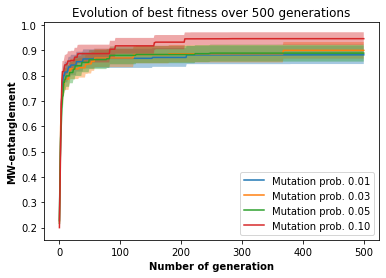

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# define the list of file names to read data from
file_names = ['Mutation_0.01_3gates.txt', 'Mutation_0.03_3gates.txt', 'Mutation_0.05_3gates.txt', 'Mutation_0.10_3gates.txt']

# create empty lists to store the data from each file
mean_best_fitness_list = []
std_best_fitness_list = []
standard_error_best_fitness_list = []

# loop through each file and read the data
for file_name in file_names:
    data = np.loadtxt(file_name, delimiter=',', skiprows=1)
    mean_best_fitness_list.append(data[:,3])
    std_best_fitness_list.append(data[:,4])
    standard_error_best_fitness_list.append(data[:,5])

# define the list of labels
labels = ['Mutation prob. 0.01', 'Mutation prob. 0.03', 'Mutation prob. 0.05', 'Mutation prob. 0.10']

# plot the best fitness with standard error for each data set
for i, mean_best_fitness in enumerate(mean_best_fitness_list):
    plt.plot(mean_best_fitness, label=labels[i])
    plt.fill_between(range(len(mean_best_fitness)), mean_best_fitness - standard_error_best_fitness_list[i], mean_best_fitness + standard_error_best_fitness_list[i], alpha=0.4)

plt.xlabel("Number of generation", fontweight='bold')
plt.ylabel("MW-entanglement", fontweight='bold')
plt.title("Evolution of best fitness over 500 generations")
plt.legend()
plt.savefig("best_fitness_3gates_allMutation.pdf")
plt.show()


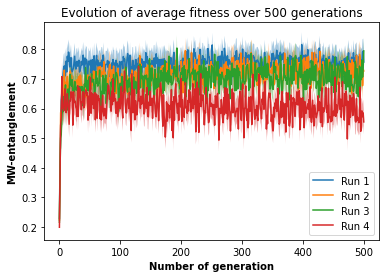

In [13]:
# define the list of file names to read data from
file_names = ['Mutation_0.01_3gates.txt', 'Mutation_0.03_3gates.txt', 'Mutation_0.05_3gates.txt', 'Mutation_0.10_3gates.txt']

# create empty lists to store the data from each file
mean_fitness_list = []
std_fitness_list = []
standard_error_list = []
mean_best_fitness_list = []
std_best_fitness_list = []
standard_error_best_fitness_list = []

# loop through each file and read the data
for file_name in file_names:
    data = np.loadtxt(file_name, delimiter=',', skiprows=1)
    mean_fitness_list.append(data[:,0])
    std_fitness_list.append(data[:,1])
    standard_error_list.append(data[:,2])
    mean_best_fitness_list.append(data[:,3])
    std_best_fitness_list.append(data[:,4])
    standard_error_best_fitness_list.append(data[:,5])

# plot the mean fitness with standard error for each data set
for i, mean_fitness in enumerate(mean_fitness_list):
    plt.plot(mean_fitness, label=f"Run {i+1}")
    plt.fill_between(range(len(mean_fitness)), mean_fitness - standard_error_list[i], mean_fitness + standard_error_list[i], alpha=0.4)

plt.xlabel("Number of generation", fontweight='bold')
plt.ylabel("MW-entanglement", fontweight='bold')
plt.title("Evolution of average fitness over 500 generations")
plt.legend()
#plt.savefig("average_fitness_3gates_allMutation.pdf")
plt.show()


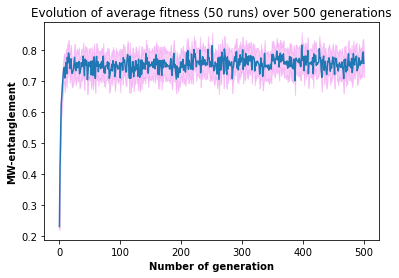

In [6]:
file_name = '/media/shailendra/New Volume/Master_thesis_Data_science/final_sem/Quevo1/Mutation_0.01_3gates.txt'

# plot the mean fitness with standard error
plt.plot(mean_fitness)
plt.fill_between(range(len(mean_fitness)), mean_fitness - standard_error, mean_fitness + standard_error, alpha=0.4, color='violet')

plt.xlabel("Number of generation", fontweight='bold')
plt.ylabel("MW-entanglement", fontweight='bold')
plt.title("Evolution of average fitness ({} runs) over 500 generations".format(number_of_runs))
#plt.savefig("plot_3gates_1Pmutation_Without_best_fit.pdf")
plt.show()

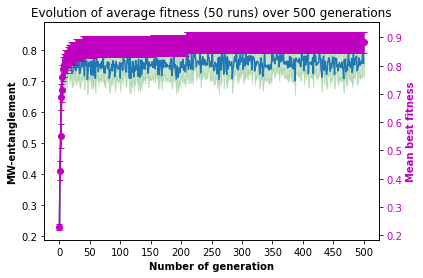

In [7]:
# create a figure with two y-axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# plot the mean fitness with standard error on the left y-axis
ax1.plot(mean_fitness)
ax1.fill_between(range(len(mean_fitness)), mean_fitness - standard_error, mean_fitness + standard_error, alpha=0.2, color='green')
ax1.set_xlabel("Number of generation", fontweight='bold')
ax1.set_ylabel("MW-entanglement", fontweight='bold')
ax1.set_title("Evolution of average fitness ({} runs) over 500 generations".format(number_of_runs))

# plot the mean best fitness with standard error on the right y-axis
ax2.errorbar(np.arange(len(mean_best_fitness)), mean_best_fitness, yerr=standard_error_best_fitness, fmt='o-',capsize=3,color='m')#, yerr=standard_error_best_fitness, fmt='o-', capsize=3, color='r')
ax2.set_ylabel('Mean best fitness', color='m',fontweight='bold')
ax2.tick_params(axis='y', labelcolor='m')

# set the x-ticks to show index values
ax1.set_xticks(np.arange(0, len(mean_fitness), 50))
ax1.set_xticklabels(np.arange(0, len(mean_fitness), 50))

# show the plot
#plt.savefig("plot_3gates_10Pmutation_with_error.pdf")
plt.show()


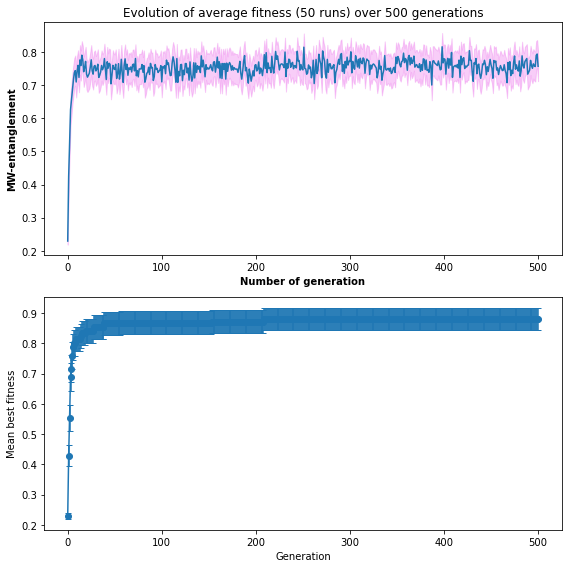

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# plot the mean fitness with standard error
ax1.plot(mean_fitness)
ax1.fill_between(range(len(mean_fitness)), mean_fitness - standard_error, mean_fitness + standard_error, alpha=0.4, color='violet')
ax1.set_xlabel("Number of generation", fontweight='bold')
ax1.set_ylabel("MW-entanglement", fontweight='bold')
ax1.set_title("Evolution of average fitness ({} runs) over 500 generations".format(number_of_runs))

# plot the mean best fitness with standard error
ax2.errorbar(np.arange(len(mean_best_fitness)), mean_best_fitness, yerr=standard_error_best_fitness, fmt='o-', capsize=3)
ax2.set_xlabel('Generation')
ax2.set_ylabel('Mean best fitness')

plt.tight_layout()
plt.show()


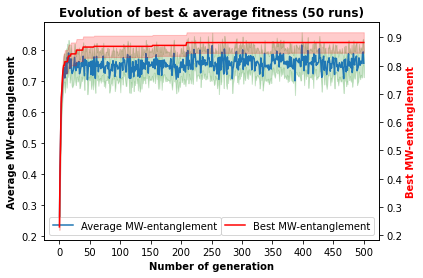

In [9]:
# create a figure with two y-axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# plot the mean fitness with standard error on the left y-axis
ax1.plot(mean_fitness, label='Average MW-entanglement')
ax1.fill_between(range(len(mean_fitness)), mean_fitness - standard_error, mean_fitness + standard_error, alpha=0.2, color='green')

# plot the shadow plot for mean best fitness with standard error on the right y-axis
ax2.fill_between(np.arange(len(mean_best_fitness)), mean_best_fitness - standard_error_best_fitness, mean_best_fitness + standard_error_best_fitness, alpha=0.2, color='red')
ax2.plot(mean_best_fitness, label='Best MW-entanglement', color='red')

# set the labels and title
ax1.set_xlabel("Number of generation", fontweight='bold')
ax1.set_ylabel("Average MW-entanglement", fontweight='bold')
ax1.set_title("Evolution of best & average fitness ({} runs)".format(number_of_runs),fontweight='bold')
ax2.set_ylabel('Best MW-entanglement', color='r', fontweight='bold')

# set the x-ticks to show index values
ax1.set_xticks(np.arange(0, len(mean_fitness), 50))
ax1.set_xticklabels(np.arange(0, len(mean_fitness), 50))

# add legend
ax1.legend(loc='lower left')
ax2.legend(loc='lower right')

# show the plot
plt.savefig("bestplot_3gates_0.01Pmutation_with_error.pdf")
plt.show()
